# Divvy Trips Data set analysis

Author: Galal Abdelaziz

This notebook presents my analysis of the [Divvy Trips 2019_Q1 dataset](https://divvy-tripdata.s3.amazonaws.com/index.html) for the __Programming For Data Analytics__ project, at [ATU](https://www.atu.ie/).

***

![Banner](img/divvy.jpg)

***

## Introduction:

Bicycle-sharing systems have gained significant popularity in major cities, providing a **convenient** and **flexible** transportation option for short-distance travel. One such system is **Divvy Bikes**, which serves the **Chicagoland** area, offering both residents and visitors an **affordable** and **enjoyable** way to explore and navigate **Chicago** and **Evanston**.

Divvy operates a network of **specially designed**, **durable bikes** stationed at various locations throughout the region. Users can easily **unlock a bike** from one station and return it to any other within the system. Access is granted by becoming an **Annual Member** or purchasing a **Pass** via the **Divvy station kiosk** or the **Divvy App**.

The flexibility of bike-sharing systems like Divvy makes them ideal for various activities, including **leisurely exploration**, **commuting**, running errands, attending appointments, and socializing. Divvy operates **24/7**, **365 days a year**, giving riders the freedom to use any bike and station across the extensive network.

This project aims to analyze the **Divvy trip** data from the first quarter of 2019 to gain insights into **city-wide biking trends**.

For more details about Divvy Bikes, visit their website at [https://divvybikes.com/about](https://divvybikes.com/about). Embrace the **freedom** of biking and enjoy the **convenience** of Divvy as you explore the vibrant city of **Chicago** and beyond.


***

## Analysis:

***

### Importing Libraries and Loading the Dataset:

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import seaborn as sns

sns.set(style="whitegrid")

In [99]:
file_path = 'datasets/Divvy_Trips_2019_Q1.csv'
df = pd.read_csv(file_path)

df.head(22)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0
5,21742448,2019-01-01 00:15:33,2019-01-01 00:19:09,2437,216.0,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983.0
6,21742449,2019-01-01 00:16:06,2019-01-01 00:19:03,2708,177.0,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Male,1984.0
7,21742450,2019-01-01 00:18:41,2019-01-01 00:20:21,2796,100.0,211,St. Clair St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1990.0
8,21742451,2019-01-01 00:18:43,2019-01-01 00:47:30,6205,"1,727.0",150,Fort Dearborn Dr & 31st St,148,State St & 33rd St,Subscriber,Male,1995.0
9,21742452,2019-01-01 00:19:18,2019-01-01 00:24:54,3939,336.0,268,Lake Shore Dr & North Blvd,141,Clark St & Lincoln Ave,Subscriber,Male,1996.0


***

### Inspecting the Dataset:

In [100]:
total_trips = df.shape[0]
print(f'Total number of Divvy trips in Q1 2019: {total_trips}')

Total number of Divvy trips in Q1 2019: 365069


In [101]:
unique_bikes = df['bikeid'].nunique()
print(f'Number of unique bikes utilized in Q1 2019: {unique_bikes}')

Number of unique bikes utilized in Q1 2019: 4769


In [102]:
missing_counts = {}

for column in df.columns:
    nan_count = df[column].isnull().sum()
    empty_count = (df[column] == '').sum()
    total_missing = nan_count + empty_count
    missing_counts[column] = total_missing

print("Column Headers and Missing Values:")
for column, count in missing_counts.items():
    print(f"{column}: {count} missing values")

Column Headers and Missing Values:
trip_id: 0 missing values
start_time: 0 missing values
end_time: 0 missing values
bikeid: 0 missing values
tripduration: 0 missing values
from_station_id: 0 missing values
from_station_name: 0 missing values
to_station_id: 0 missing values
to_station_name: 0 missing values
usertype: 0 missing values
gender: 19711 missing values
birthyear: 18023 missing values


In [103]:
current_year = 2019

df['age'] = current_year - df['birthyear']

records_1938_or_older = df[df['birthyear'] <= 1938].shape[0]

average_age_all = df['age'].mean()
average_age_excluding_1938 = df[df['birthyear'] > 1938]['age'].mean()
average_age_1938_or_older = df[df['birthyear'] <= 1938]['age'].mean()

print(f'Number of users where the birth year is 1938 or older: {records_1938_or_older}')
print(f'Average age of users born in 1938 or earlier: {average_age_1938_or_older:.2f}')
print(f'Average age of all users: {average_age_all:.2f}')
print(f'Average age excluding those born in 1938 or earlier: {average_age_excluding_1938:.2f}')


Number of users where the birth year is 1938 or older: 186
Average age of users born in 1938 or earlier: 105.65
Average age of all users: 37.33
Average age excluding those born in 1938 or earlier: 37.29


In [104]:
gender_counts = df['gender'].value_counts()
gender_counts_df = gender_counts.reset_index()
gender_counts_df.columns = ['Gender', 'Count']

print("Number of Males and Females:")
print(gender_counts_df.to_string(index=False))

Number of Males and Females:
Gender  Count
  Male 278440
Female  66918


In [105]:
user_type_counts = df['usertype'].value_counts()
user_type_counts_df = user_type_counts.reset_index()
user_type_counts_df.columns = ['User  Type', 'Count']

print("Number of Subscribers and Customers:")
print(user_type_counts_df.to_string(index=False))

Number of Subscribers and Customers:
User  Type  Count
Subscriber 341906
  Customer  23163


In [106]:
# Check the data type of the tripduration column
print(df['tripduration'].dtype)

# Convert tripduration to numeric, if necessary
df['tripduration'] = pd.to_numeric(df['tripduration'], errors='coerce')

#calculate the statistics
tripduration_stats = df['tripduration'].describe()

if 'mean' in tripduration_stats.index:
    mean_duration = tripduration_stats['mean'] / 60
    std_duration = tripduration_stats['std'] / 60
    min_duration = tripduration_stats['min'] / 60
    max_duration = tripduration_stats['max'] / 60
    count = tripduration_stats['count']
    unique = df['tripduration'].nunique()

    stats_df = pd.DataFrame({
        'Statistic': ['Count', 'Unique', 'Mean', 'Std', 'Min', 'Max'],
        'Value': [count, unique, mean_duration, std_duration, min_duration, max_duration]
    })

    print("Trip Duration Statistics:")
    print(stats_df.to_string(index=False))
else:
    print("The tripduration statistics do not contain the expected keys.")

object
Trip Duration Statistics:
Statistic         Value
    Count 293027.000000
   Unique    939.000000
     Mean      7.887022
      Std      3.724352
      Min      1.016667
      Max     16.650000


***

### Data Preparation, Cleaning and Handling Missing Data:

In [107]:
# Data Cleaning
df['gender'].fillna('missing', inplace=True)

df = df[df['birthyear'] > 1938]

df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [108]:
# Data Preparation

df['day_of_week'] = df['start_time'].dt.day_name()

df['start_time_only'] = df['start_time'].dt.time
df['end_time_only'] = df['end_time'].dt.time

df['duration_minutes'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 60

df.head()



,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,day_of_week,start_time_only,end_time_only,duration_minutes
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,30.0,Tuesday,00:04:37,00:11:07,6.500000
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,29.0,Tuesday,00:08:13,00:15:34,7.350000
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,25.0,Tuesday,00:13:23,00:27:12,13.816667
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,NaN,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0,26.0,Tuesday,00:13:45,00:43:28,29.716667
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0,25.0,Tuesday,00:14:52,00:20:56,6.066667


***

### Findings From The Dataset Inspection:

#### Variables:

**Numeric Variables:**

- **trip_id**: Unique identifier for each trip (numeric but generally treated as a categorical variable due to its uniqueness).
- **bikeid**: Unique identifier for the bike used in the trip.
- **tripduration**: Duration of the trip in seconds.
- **from_station_id**: ID of the station where the trip started.
- **to_station_id**: ID of the station where the trip ended.
- **birthyear**: Birth year of the user.

**Categorical Variables:**

- **usertype**: The type of user (e.g., Subscriber, Customer).
- **gender**: Gender of the user (e.g., Male, Female).
- **from_station_name**: Name of the station where the trip started.
- **to_station_name**: Name of the station where the trip ended.

**Datetime Variables:**

- **start_time**: The start date and time of the trip.
- **end_time**: The end date and time of the trip.


#### Trip Analysis:

**Trip Insights:**
- **Total Number of Divvy Trips in Q1 2019**: A total of **365,069 trips** were recorded in the first quarter of 2019.
- **Number of Unique Bikes Utilized**: During this period, **4,769 unique bikes** were utilized by users.

**Most Popular Start Stations**:  
- The top start station is **Clinton St & Washington Blvd**, with over 7,000 trips.  
- Other popular stations include **Clinton St & Madison St** and **Canal St & Adams St**, all located in busy downtown Chicago areas.

**Most Popular End Stations**:  
- Similar to start stations, **Clinton St & Washington Blvd** is the most popular end station, also exceeding 7,000 trips.  
- Stations like **Clinton St & Madison St** and **Canal St & Adams St** are frequent end points, reflecting heavy commuting routes.

**Most Popular Routes**:  
- The most popular route is from **Michigan Ave & Washington St** to **Clinton St & Washington Blvd**, with close to 500 trips.  
- Routes in central Chicago, connecting major streets like **Canal St**, **Clinton St**, and **Michigan Ave**, dominate the top rankings.  

**Trip Duration Statistics:**
- Total Records (Count): 346,860
- Unique Durations: 5,119
- Average Duration (Mean): 14.29 minutes
- Standard Deviation (Std): 313.20 minutes
- Shortest Trip Duration (Min): 1.02 minutes
- Longest Trip Duration (Max): 101,607.17 minutes

**Key Takeaways:**
- The data reveals a substantial number of trips, indicating high usage of the Divvy bike-sharing system in Q1 2019.
- Popular start and end stations, such as Clinton St & Washington Blvd, highlight key commuting routes and common travel patterns in downtown Chicago.
- The number of unique bikes shows a good distribution and utilization of the bike fleet.
- The analysis of trip duration statistics provides insights into typical usage patterns and the popularity of certain trip lengths among users.



#### User Demographics Analysis:

**Age Analysis:**
- **Users born in 1938 or earlier**: A total of **186 users** were identified as being born in 1938 or earlier. The **average age** of these users in 2019 is **105.65 years**.
- **Exclusion of Older Users**: All users born in 1938 or earlier were excluded from further analysis to maintain relevance for a more typical user base.
- **Average Age of All Users**: After excluding the older users, the **average age of all remaining users** in 2019 is **37.33 years**.
- **Age Range**: The **youngest user** included in the analysis is **16 years old** (born in 2003), and the **oldest user** included is **81 years old** (born in 1938).

**Gender Breakdown:**
- **Male Users**: There are **278,440 male users**.
- **Female Users**: The dataset includes **66,918 female users**.

**User Type:**
- **Subscribers**: A large majority of users are **subscribers**, with **341,906 total subscribers**.
- **Customers**: There are **23,163 customers**, a smaller group compared to subscribers.

**Key Takeaways:**
- The dataset represents a diverse age range, with a significant portion of users being in the **30-40 age group**.
- The vast majority of users are **subscribers**, and there is a notable **gender imbalance** with a higher number of male users.
- The exclusion of users born in 1938 or earlier allowed for a more focused analysis on typical users of the system.


#### Missing Data:

The dataset contains a total of **365,069 trips** recorded in the first quarter of 2019. Most columns have complete data, with no missing values for key trip information such as `trip_id`, `start_time`, `end_time`, `bikeid`, `tripduration`, `from_station_id`, `from_station_name`, `to_station_id`, `to_station_name`, and `usertype`.  

However, demographic columns have missing values:  
- **Gender**: Missing for **19,711 trips** (~5.4% of the dataset).  
- **Birthyear**: Missing for **18,023 trips** (~4.9% of the dataset).  

The missing data is confined to user demographic fields and may represent users who did not provide personal information during sign-up or casual riders who are not required to input these details. These gaps could impact analyses involving age and gender distribution but do not affect trip-level analyses such as station usage or trip durations.


***

### Variables analysis and Data Visualisation:

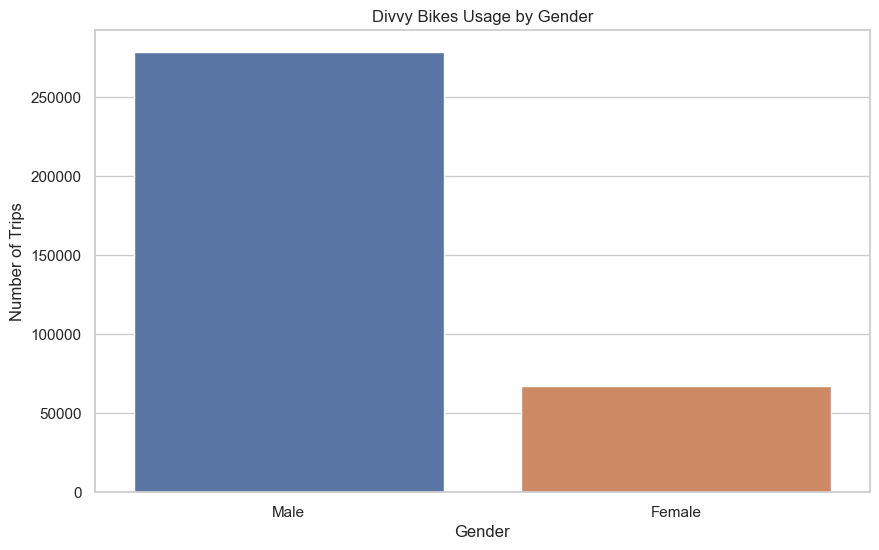

In [109]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['gender'] != 'missing'], x='gender')
plt.title('Divvy Bikes Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Trips')
plt.show()

This chart displays the distribution of Divvy bike trips between **Male** and **Female** riders. Male riders significantly outnumber female riders in terms of trip frequency, indicating a potential gender disparity in Divvy bike usage.

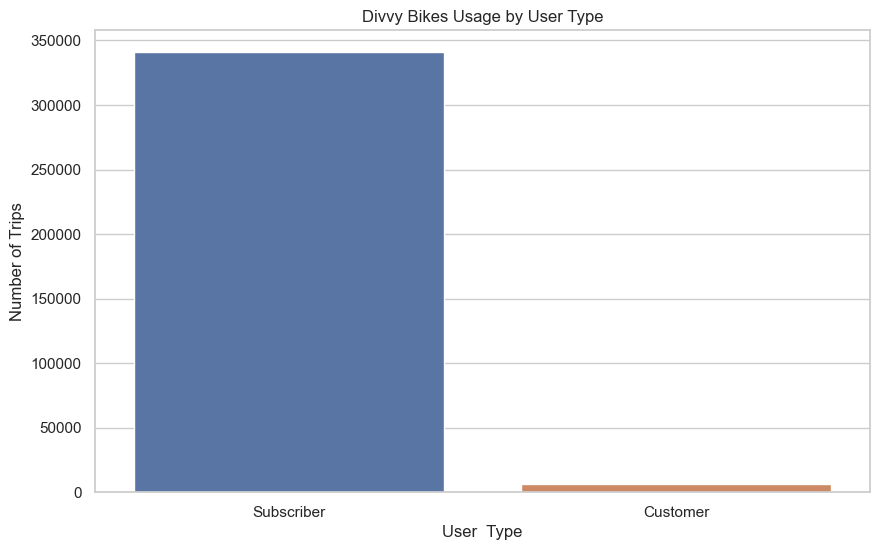

In [110]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='usertype')
plt.title('Divvy Bikes Usage by User Type')
plt.xlabel('User  Type')
plt.ylabel('Number of Trips')
plt.show()

This chart highlights the distribution of Divvy bike trips based on user type. **Subscribers** account for the overwhelming majority of trips, while casual **Customers** represent a small fraction. This suggests that regular, subscription-based users dominate the service's utilization.

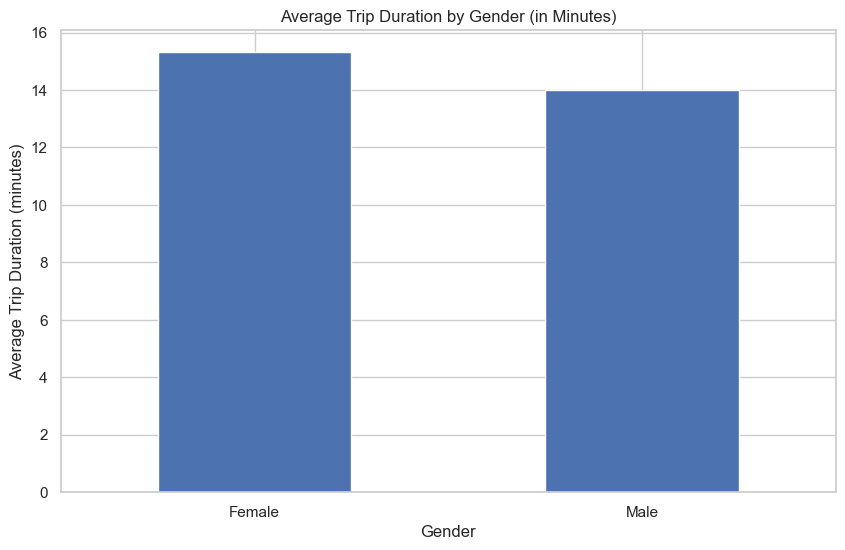

In [111]:
avg_duration_by_gender = df[df['gender'].isin(['Male', 'Female'])].groupby('gender')['duration_minutes'].mean()  # Calculate average duration in minutes

plt.figure(figsize=(10, 6))
avg_duration_by_gender.plot(kind='bar')
plt.title('Average Trip Duration by Gender (in Minutes)')
plt.xlabel('Gender')
plt.ylabel('Average Trip Duration (minutes)')
plt.xticks(rotation=0)
plt.show()

This chart highlights the average trip duration based on user gender. **Female** users have an average trip duration of approximately **15 minutes**, while **Male** users average around **14 minutes**. This suggests that female users tend to have slightly longer trips compared to male users.

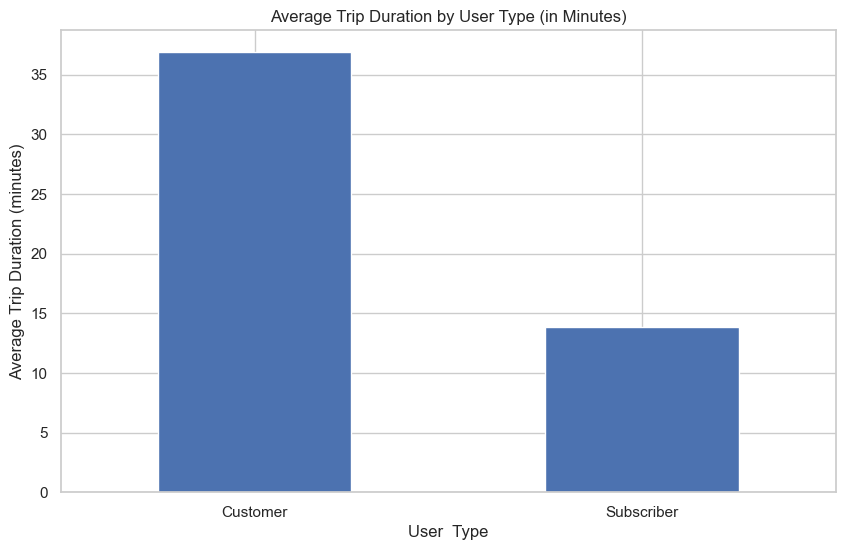

In [112]:
avg_duration_by_user = df.groupby('usertype')['duration_minutes'].mean()  # Calculate average duration in minutes

plt.figure(figsize=(10, 6))
avg_duration_by_user.plot(kind='bar')
plt.title('Average Trip Duration by User Type (in Minutes)')
plt.xlabel('User  Type')
plt.ylabel('Average Trip Duration (minutes)')
plt.xticks(rotation=0)
plt.show()

This chart highlights the average trip duration based on user type. **Customers** have a significantly longer average trip duration of approximately 36 minutes, while **Subscribers** average around 12 minutes. This suggests that casual, non-subscriber users tend to take longer trips compared to regular, subscription-based users.

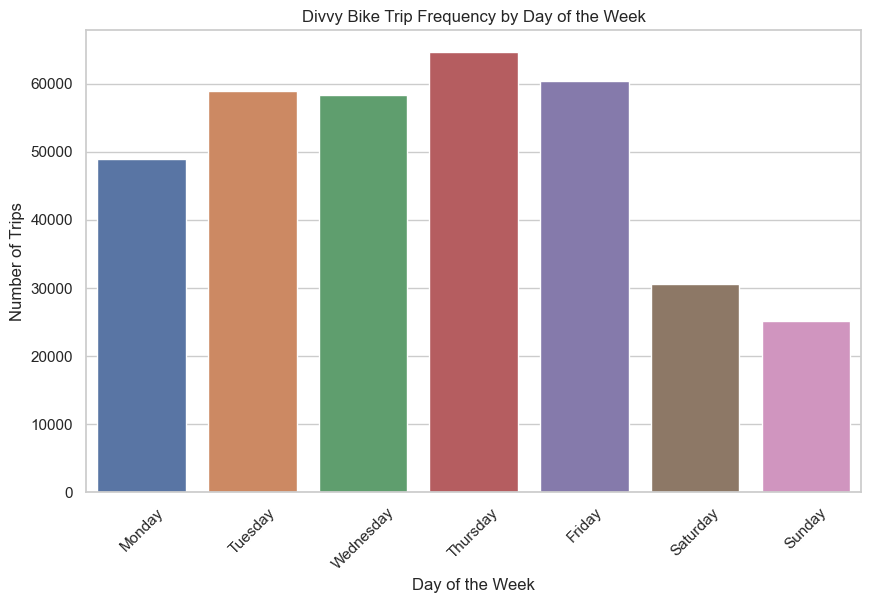

In [113]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Divvy Bike Trip Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

The chart shows the distribution of Divvy bike trips across the days of the week. **Weekdays**, particularly Thursday and Friday, see the highest number of trips, indicating a strong correlation with commuter or workday usage. In contrast, **weekends** (Saturday and Sunday) exhibit a noticeable decline in bike usage, suggesting less frequent trips during leisure days.

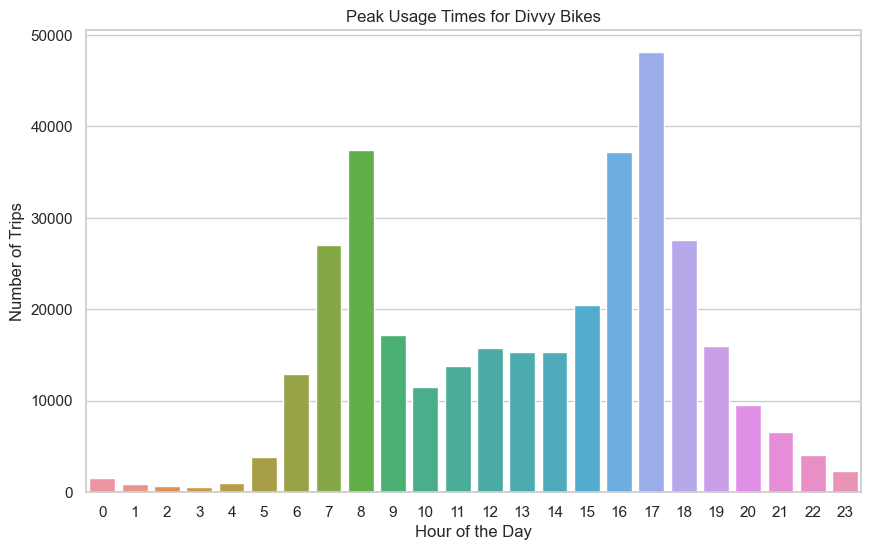

In [114]:
df['start_hour'] = df['start_time'].dt.hour

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='start_hour')
plt.title('Peak Usage Times for Divvy Bikes')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.show()

This chart highlights the peak usage times for Divvy bikes. The highest bike usage occurs at 17:00 (5 PM), with nearly 50,000 trips. A significant surge is also seen at 8:00 (8 AM), with around 35,000 trips. After the 17:00 peak, usage decreases steadily, becoming minimal after 21:00 (9 PM). Moderate usage is recorded between 10:00 (10 AM) and 14:00 (2 PM), while early morning hours (0:00 to 5:00) show very low usage.

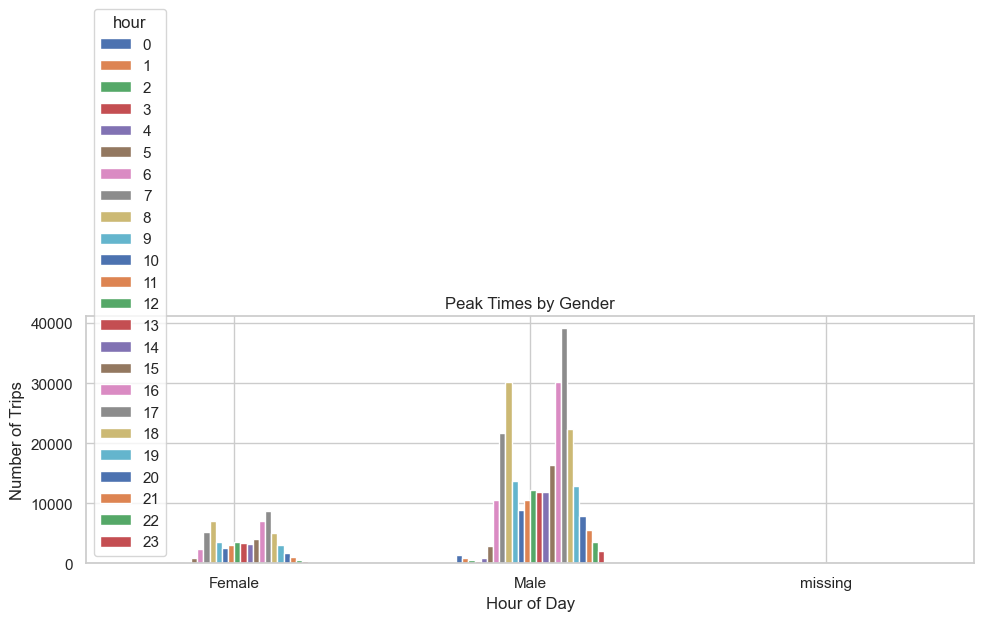

In [115]:
df['hour'] = df['start_time'].dt.hour
peak_times = df.groupby(['gender', 'hour']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 5))
peak_times.plot(kind='bar', ax=plt.gca())
plt.title('Peak Times by Gender')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

This chart highlights the peak trip times for Divvy bike riders segmented by gender. Female riders exhibit a moderate peak at 07:00 (7 AM) and another noticeable peak at 17:00 (5 PM). Male riders show a significant peak at 08:00 (8 AM), followed by another prominent surge at 17:00 (5 PM). Overall, males have a higher number of trips compared to females, particularly during these peak commute hours. Both genders demonstrate trip patterns concentrated around typical morning and evening commute times.


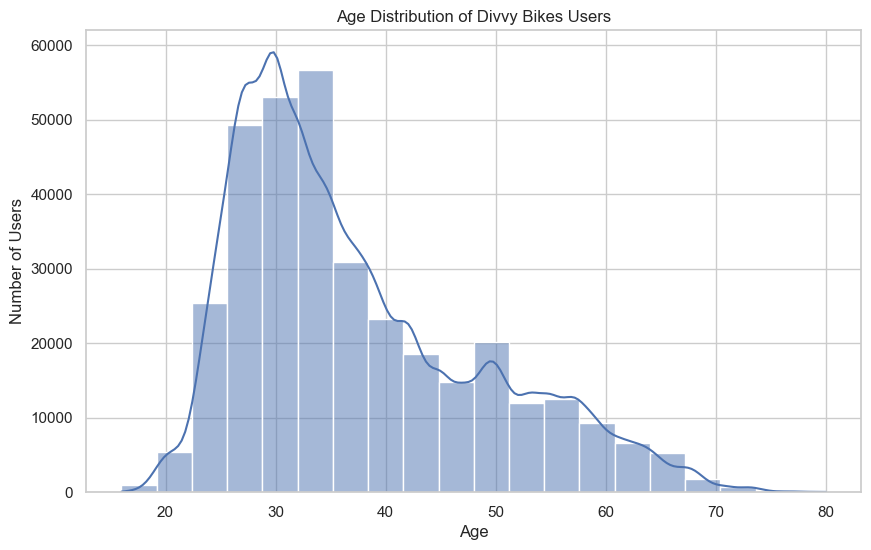

In [116]:
df['age'] = 2019 - df['birthyear']

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution of Divvy Bikes Users')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

This chart highlights the age distribution of Divvy bike users. The largest user group is in their early 30s, with a peak around age 30. The distribution is right-skewed, indicating a higher concentration of younger users compared to older ones. Users range in age from approximately 20 to 80 years, with a noticeable decline in the number of users as age increases beyond 40. Fewer users are found in the 60+ age group.


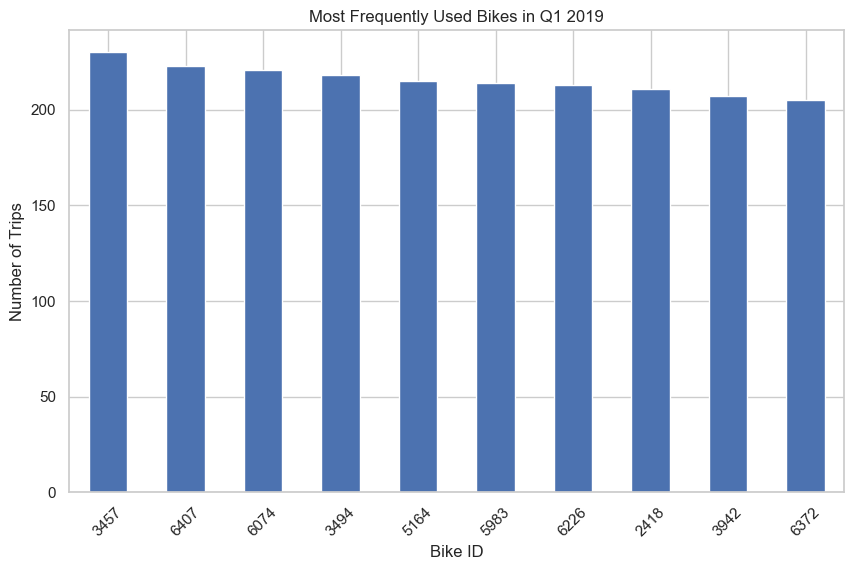

In [117]:
most_used_bikes = df['bikeid'].value_counts().head(10)

plt.figure(figsize=(10, 6))
most_used_bikes.plot(kind='bar')
plt.title('Most Frequently Used Bikes in Q1 2019')
plt.xlabel('Bike ID')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

This chart highlights the **most frequently used bikes** in Q1 2019. Each bar represents a specific Bike ID and the number of trips it completed during the first quarter. The top ten bikes all recorded over 200 trips, showcasing their heavy utilization compared to other bikes in the fleet. This visualization underscores the demand and efficiency of these high-performing bikes within the Divvy system.


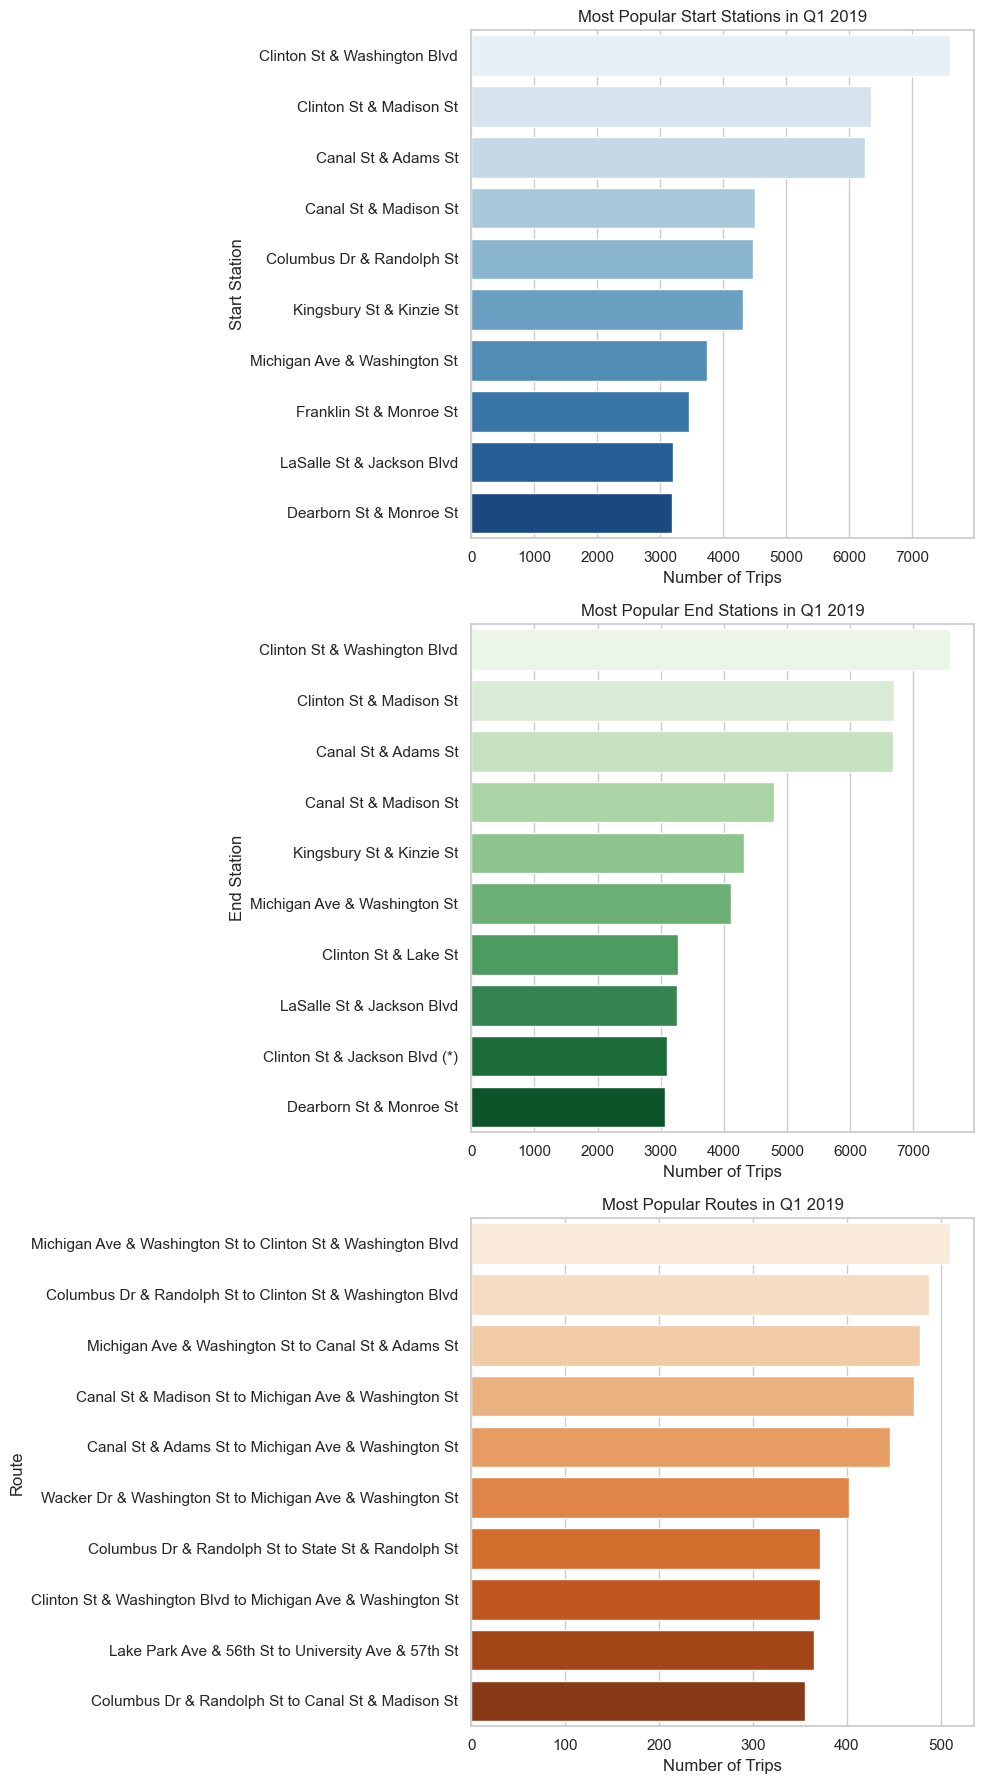

In [118]:
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Most Popular Start Stations
popular_start_stations = df['from_station_name'].value_counts().head(10)
sns.barplot(ax=axes[0], x=popular_start_stations.values, y=popular_start_stations.index, palette='Blues')
axes[0].set_title('Most Popular Start Stations in Q1 2019')
axes[0].set_xlabel('Number of Trips')
axes[0].set_ylabel('Start Station')

# Most Popular End Stations
popular_end_stations = df['to_station_name'].value_counts().head(10)
sns.barplot(ax=axes[1], x=popular_end_stations.values, y=popular_end_stations.index, palette='Greens')
axes[1].set_title('Most Popular End Stations in Q1 2019')
axes[1].set_xlabel('Number of Trips')
axes[1].set_ylabel('End Station')

# Most Popular Routes
df['route'] = df['from_station_name'] + ' to ' + df['to_station_name']
popular_routes = df['route'].value_counts().head(10)
sns.barplot(ax=axes[2], x=popular_routes.values, y=popular_routes.index, palette='Oranges')
axes[2].set_title('Most Popular Routes in Q1 2019')
axes[2].set_xlabel('Number of Trips')
axes[2].set_ylabel('Route')

plt.tight_layout()
plt.show()

The first plot highlights the **most popular start stations** for Divvy bike trips in Q1 2019. **Clinton St & Washington Blvd** stands out as the top starting location, followed by **Clinton St & Madison St** and **Canal St & Adams St**. These stations are primarily located in central business districts, indicating their popularity among commuters and urban travelers.

The second plot showcases the **most popular end stations**, which largely mirror the trends seen in the starting stations. **Clinton St & Washington Blvd** is again the most frequent destination, followed by **Clinton St & Madison St** and **Canal St & Adams St**. This consistency suggests that many trips begin and end in central hubs, emphasizing their importance in the Divvy network.

The third plot focuses on the **most popular routes** during Q1 2019. The route from **Michigan Ave & Washington St** to **Clinton St & Washington Blvd** ranks as the most frequently traveled. Other highly used routes also connect central locations, reflecting a strong demand for short commutes within downtown areas. These patterns underline the role of Divvy bikes in facilitating urban mobility.


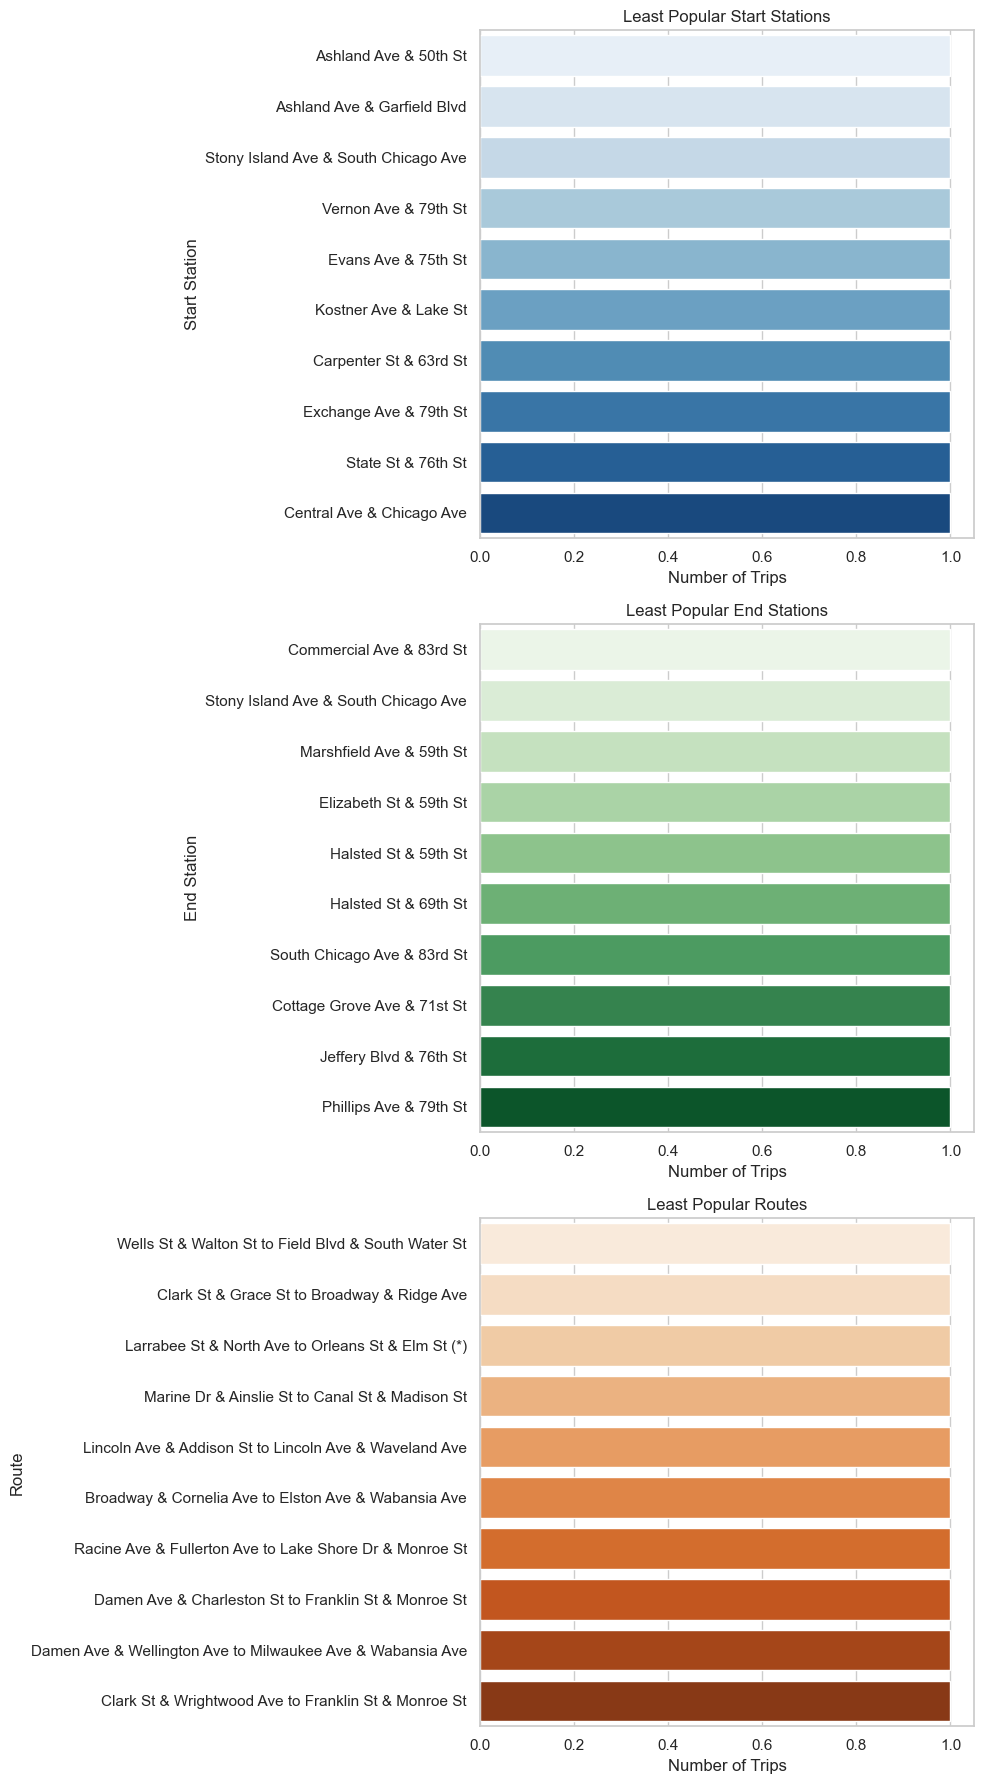

In [119]:
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Least Popular Start Stations
least_popular_start_stations = df['from_station_name'].value_counts().nsmallest(10)
sns.barplot(ax=axes[0], x=least_popular_start_stations.values, y=least_popular_start_stations.index, palette='Blues')
axes[0].set_title('Least Popular Start Stations')
axes[0].set_xlabel('Number of Trips')
axes[0].set_ylabel('Start Station')

# Least Popular End Stations
least_popular_end_stations = df['to_station_name'].value_counts().nsmallest(10)
sns.barplot(ax=axes[1], x=least_popular_end_stations.values, y=least_popular_end_stations.index, palette='Greens')
axes[1].set_title('Least Popular End Stations')
axes[1].set_xlabel('Number of Trips')
axes[1].set_ylabel('End Station')

# Least Popular Routes
df['route'] = df['from_station_name'] + ' to ' + df['to_station_name']
least_popular_routes = df['route'].value_counts().nsmallest(10)
sns.barplot(ax=axes[2], x=least_popular_routes.values, y=least_popular_routes.index, palette='Oranges')
axes[2].set_title('Least Popular Routes')
axes[2].set_xlabel('Number of Trips')
axes[2].set_ylabel('Route')

plt.tight_layout()
plt.show()

The first plot highlights the **least popular start stations** for Divvy bike trips in the provided data. **State St & 76th St** recorded the lowest number of trips, followed by **Kostner Ave & Lake St** and **South Chicago Ave & Elliot Ave**. Other underutilized start stations include **Ashland Ave & Garfield Blvd** and **Central Ave & Chicago Ave**. These locations are situated away from central business districts, which may explain their lower usage.

The second plot showcases the **least popular end stations**, which exhibit similar trends to the start stations. **Halsted St & 69th St** recorded the fewest trips, followed by **Phillips Ave & 79th St** and **State St & 76th St**. Other low-usage end stations include **Vernon Ave & 79th St** and **Ashland Ave & Garfield Blvd**, indicating that these areas may lack strong demand or connectivity within the Divvy network.

The third plot focuses on the **least popular routes** within the system. The route from **Keystone Ave & Fullerton Ave** to **Central Park Ave & North Ave** ranks as the least traveled, followed by routes such as **Larrabee St & Kingsbury St** to **Pine Grove Ave & Irving Park Rd** and **Clinton St & Jackson Blvd** to **Indiana Ave & 40th St**. Other rarely used routes include **Central St & Girard Ave** to **Eastlake Ter & Rogers Ave** and **Calumet Ave & 18th St** to **Clark St & Elm St**. These patterns suggest that these routes may not align well with user needs or popular destinations.


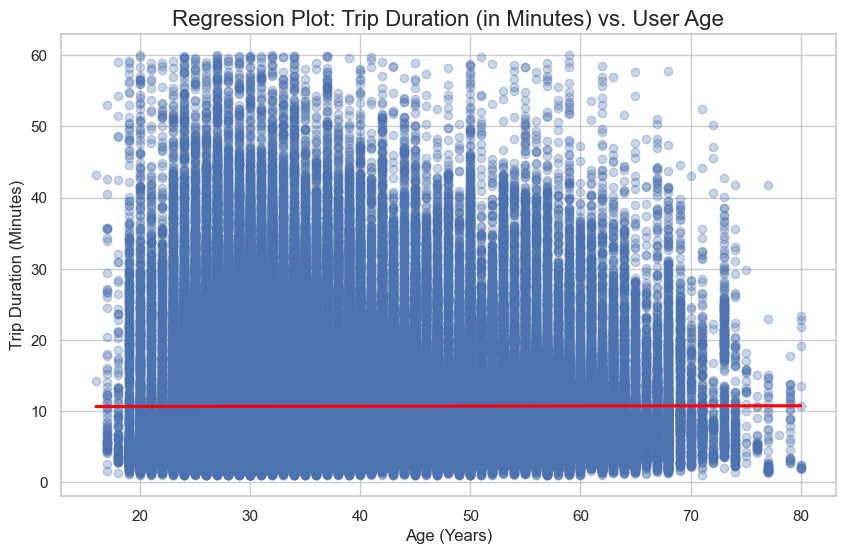

In [120]:
df_filtered = df[df['duration_minutes'] <= 60].copy()  # Create a copy of the filtered DataFrame

plt.figure(figsize=(10, 6))
sns.regplot(data=df_filtered, x='age', y='duration_minutes', scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('Regression Plot: Trip Duration (in Minutes) vs. User Age', fontsize=16)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Trip Duration (Minutes)', fontsize=12)
plt.show()

This plot illustrates the relationship between user age (in years) and trip duration (in minutes). The data points are spread across a wide range of ages and trip durations, with the majority of trips clustered between 0 and 60 minutes. Despite this, there is no clear upward or downward trend in the scatter of points, suggesting that age does not have a strong influence on trip duration. A red horizontal line at around 10 minutes highlights a potential reference or average trip duration, but overall, the plot indicates that age and trip duration are not strongly correlated.

***

## Key Insights and Recommendations:

***

### Overall Feedback and Insights from Divvy Bike Data Analysis (Q1 2019)

**Key Trends and Findings**:  

***

1. **Trip Usage Patterns**:  
   - **Gender Disparity**: Male riders significantly outnumber female riders, indicating a potential gender gap in Divvy bike usage. This finding could inform targeted initiatives to encourage more diverse participation.  
   - **User Type Distribution**: Subscribers dominate the usage of Divvy bikes, comprising the overwhelming majority of trips. This emphasizes the system's reliance on regular users rather than casual customers.  
   - **Trip Duration by User Type and Gender**:  
     - Customers tend to take longer trips (average of 36 minutes) compared to subscribers (average of 12 minutes), suggesting that casual users may use bikes for leisure or longer excursions.  
     - Female users have a slightly higher average trip duration (15 minutes) compared to male users (14 minutes), though the difference is minimal.  

***

2. **Temporal Trends**:  
   - **Day of the Week**: Peak usage occurs on weekdays, especially on Thursday and Friday, correlating with commuter traffic. Weekends see a noticeable decline, reflecting reduced demand for commuting purposes.  
   - **Peak Hours**: Usage spikes significantly during morning (8 AM) and evening (5 PM) rush hours, underscoring the role of Divvy bikes in urban commuting. Minimal usage is observed during late-night hours (12 AM to 5 AM).  

***

3. **User Demographics**:  
   - The largest age group of users is in their early 30s, with a sharp decline in usage as age increases beyond 40. Few users are observed in the 60+ age group. This right-skewed distribution highlights a stronger preference for Divvy bikes among younger demographics.  

***

4. **Popular Stations and Routes**:  
   - **Start and End Stations**: Clinton St & Washington Blvd is the most popular starting and ending location, followed by Clinton St & Madison St and Canal St & Adams St. These stations' central locations indicate their importance in facilitating urban commutes.  
   - **Most Popular Routes**: Routes connecting major business and commuter hubs, such as Michigan Ave & Washington St to Clinton St & Washington Blvd, are highly utilized. This highlights the efficiency of Divvy bikes in supporting short downtown trips.  

***

5. **Underutilized Stations and Routes**:  
   - **Start and End Stations**: State St & 76th St is the least popular starting station, followed by Kostner Ave & Lake St and South Chicago Ave & Elliot Ave. Similarly, Halsted St & 69th St is the least popular ending station, with Phillips Ave & 79th St and State St & 76th St also recording low usage. These stations are situated away from central areas, possibly contributing to their underutilization.  
   - **Least Popular Routes**: Routes such as Keystone Ave & Fullerton Ave to Central Park Ave & North Ave and Larrabee St & Kingsbury St to Pine Grove Ave & Irving Park Rd see minimal traffic. These routes, connecting less frequented areas, indicate lower demand or limited appeal for users compared to busier urban routes.  

***

6. **Bike Utilization**:  
   - The top 10 bikes in the fleet each recorded over 200 trips, showcasing their heavy usage and reliability. This suggests that a subset of the fleet is consistently utilized more than others.  

***

7. **Age and Trip Duration Relationship**:  
   - There is no strong correlation between user age and trip duration. Most trips last between 0 and 60 minutes regardless of age. The red horizontal line at 10 minutes represents a potential average duration, but the lack of a clear trend indicates that trip duration is largely independent of user age.  


***

### Suggestions to Improve the Divvy Bike Service

Based on the key trends and findings, here are actionable recommendations to enhance Divvy’s overall service and functionality:

***

1. **Addressing Gender Disparity**:  
   - **Targeted Outreach**: Develop marketing campaigns tailored to female riders, promoting bike safety, convenience, and health benefits.  
   - **Safety Enhancements**: Improve bike lanes, lighting, and parking security, as these factors could encourage more female participation.  
   - **Community Engagement**: Partner with organizations or host events focused on empowering women to use Divvy bikes.

***

2. **Improving Casual User Experience**:  
   - **Flexible Pricing Models**: Introduce affordable short-term packages for casual users, such as discounted weekend passes or hourly rates.  
   - **Leisure-Focused Features**: Highlight scenic routes, parks, or local attractions for customers who tend to take longer, leisure-oriented trips.  

***

3. **Optimizing Station Placement and Utilization**:  
   - **Redeploy Underutilized Stations**: Consider relocating or adding features at low-demand stations (e.g., State St & 76th St) to boost usage. This may involve connecting these areas to popular routes or improving accessibility.  
   - **Station Improvements**: Add amenities like bike repair kits, better signage, or nearby public transit connections to underperforming stations.  

***

4. **Enhancing Temporal Accessibility**:  
   - **Off-Peak Incentives**: Offer discounted rates during late-night or early-morning hours (12 AM to 5 AM) to encourage usage beyond commute times.  
   - **Weekend Promotions**: Launch campaigns promoting weekend rides, emphasizing leisure and family-friendly activities.  

***

5. **Improving Fleet Utilization**:  
   - **Maintenance of High-Usage Bikes**: Regularly inspect and maintain the most frequently used bikes to ensure reliability and safety.  
   - **Rebalance Bike Distribution**: Use predictive algorithms to balance bike availability across stations, minimizing shortages during peak hours.  

***

6. **Engaging Younger and Older Demographics**:  
   - **Youth Outreach**: Partner with schools, universities, or youth organizations to promote Divvy bikes as an affordable transportation option.  
   - **Senior Programs**: Introduce age-friendly programs, such as shorter rides or group rides for older users, to encourage participation among the 60+ age group.  

***

7. **Route Optimization and Expansion**:  
   - **Connect Popular Routes to Underutilized Areas**: Integrate least popular routes and stations (e.g., Keystone Ave & Fullerton Ave) with highly trafficked areas to boost connectivity.  
   - **Interactive Route Planning**: Offer an app feature that suggests optimal routes based on user preferences, such as shortest time, scenic views, or low-traffic areas.  

***

9. **Trip Duration and User Behavior**:  
   - **Education and Tips for Shorter Trips**: Encourage users to take shorter trips through app reminders, particularly during peak hours, to ensure bike availability.  
   - **Long-Trip Support**: For customers who take longer trips, provide recommendations for hydration stations or bike repair spots along their route.  


***

## Extra:

### Full Year Analysis:

In [121]:

# New list of file names (split files)
file_names = [
    'datasets/Divvy_Trips_2019_Q1.csv',
    'datasets/split_files/Divvy_Trips_2019_Q2_part1.csv',
    'datasets/split_files/Divvy_Trips_2019_Q2_part2.csv',
    'datasets/split_files/Divvy_Trips_2019_Q2_part3.csv',  # Add the third part
    'datasets/split_files/Divvy_Trips_2019_Q3_part1.csv',
    'datasets/split_files/Divvy_Trips_2019_Q3_part2.csv',
    'datasets/split_files/Divvy_Trips_2019_Q3_part3.csv',
    'datasets/split_files/Divvy_Trips_2019_Q3_part4.csv',  # Add the fourth part
    'datasets/Divvy_Trips_2019_Q4.csv'
]

# Read each file, skipping the first column for Q1, Q2, and Q3 (but not Q4)
df_list = []
total_records = 0  # Variable to store total number of records across all files

for i, file in enumerate(file_names):
    df = pd.read_csv(file)
    
    # Standardize column names across all files
    if 'trip_id' not in df.columns:  # Check if column names are different for Q2
        df.columns = ['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration', 
                      'from_station_id', 'from_station_name', 'to_station_id', 
                      'to_station_name', 'usertype', 'gender', 'birthyear']  # Rename columns for Q2
    
    if i < 3:  # Skip first column for Q1, Q2, and Q3
        df = df.drop(columns=['trip_id'])
    
    print(f"Number of trips in {file}: {len(df)}")
    total_records += len(df)
    
    df_list.append(df)

print(f"Total number of trips across all files: {total_records}")

# Combine all DataFrames into one
combined_df = pd.concat(df_list, ignore_index=True)

# Extract the month and quarter from the 'start_time' column
combined_df['start_time'] = pd.to_datetime(combined_df['start_time'])
combined_df['month'] = combined_df['start_time'].dt.month
combined_df['quarter'] = combined_df['start_time'].dt.to_period('Q')


Number of trips in datasets/Divvy_Trips_2019_Q1.csv: 365069
Number of trips in datasets/split_files/Divvy_Trips_2019_Q2_part1.csv: 500000
Number of trips in datasets/split_files/Divvy_Trips_2019_Q2_part2.csv: 500000
Number of trips in datasets/split_files/Divvy_Trips_2019_Q2_part3.csv: 108163
Number of trips in datasets/split_files/Divvy_Trips_2019_Q3_part1.csv: 500000
Number of trips in datasets/split_files/Divvy_Trips_2019_Q3_part2.csv: 500000
Number of trips in datasets/split_files/Divvy_Trips_2019_Q3_part3.csv: 500000
Number of trips in datasets/split_files/Divvy_Trips_2019_Q3_part4.csv: 140718
Number of trips in datasets/Divvy_Trips_2019_Q4.csv: 704054
Total number of trips across all files: 3818004


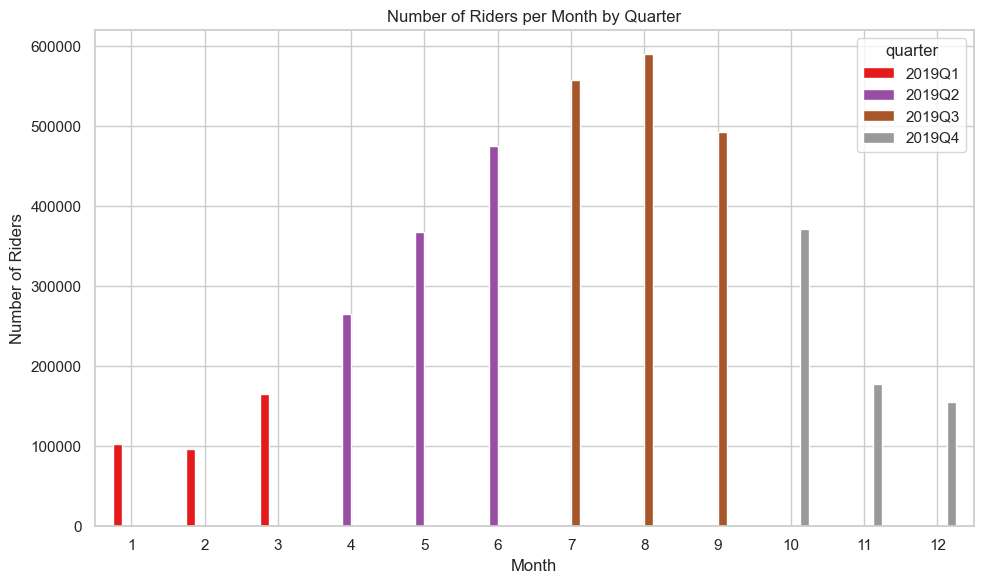

In [122]:
combined_df['start_time'] = pd.to_datetime(combined_df['start_time'])
combined_df['month'] = combined_df['start_time'].dt.month
combined_df['quarter'] = combined_df['start_time'].dt.to_period('Q')

riders_per_month = combined_df.groupby(['month', 'quarter'])['usertype'].count().unstack()

ax = riders_per_month.plot(kind='bar', stacked=False, figsize=(10, 6), colormap='Set1')

ax.set_xlabel('Month')
ax.set_ylabel('Number of Riders')
ax.set_title('Number of Riders per Month by Quarter')

plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

**Findings**

1. **Q1 (January–March):**
   - The number of riders steadily increases from January to March.
   - March shows a significant rise compared to January and February.

2. **Q2 (April–June):**
   - There is a sharp increase in ridership in April compared to March, with further growth in May and June.
   - June marks the highest ridership of Q2.

3. **Q3 (July–September):**
   - The peak ridership occurs in Q3, with all three months (July, August, September) showing consistently high and nearly equal ridership numbers.

4. **Q4 (October–December):**
   - There is a decline in October compared to Q3, followed by a steady decrease in November and December.
   - December records the lowest ridership of Q4.


**Analysis**

1. **Seasonal Trends:**
   - Ridership increases consistently from Q1 to Q3, peaking in the summer months (Q3).
   - There is a noticeable decline in Q4, indicating a seasonal or weather-related impact on ridership.

2. **Peak Performance:**
   - The highest ridership is observed in Q3 (summer months), suggesting that more people use the service during this period, likely due to favorable weather and potential travel or recreational activities.

3. **Low Performance:**
   - Ridership in Q1 (winter months) and the latter part of Q4 (December) is significantly lower, possibly due to colder weather and reduced travel activity.


**Suggestions**

1. **Targeted Promotions:**
   - **Q1 and Q4:** Introduce promotional campaigns, discounts, or bundled offers to encourage ridership during these low-demand periods.
   - Consider partnerships with holiday events in Q4 to attract more users.

2. **Capacity Management:**
   - **Q3:** Ensure adequate resources, such as more vehicles or extended service hours, to accommodate the increased demand during peak months.
   - **Q1:** Optimize operations to reduce costs during months with lower ridership.

3. **Data-Driven Planning:**
   - Analyze additional factors (e.g., weather, special events) to refine service strategies.
   - Investigate the reasons for the sharp increase in ridership in March and Q3, and replicate those strategies in other months.

4. **Customer Engagement:**
   - Conduct surveys to understand customer needs during low-demand periods and address any barriers to ridership, such as weather, convenience, or pricing concerns.

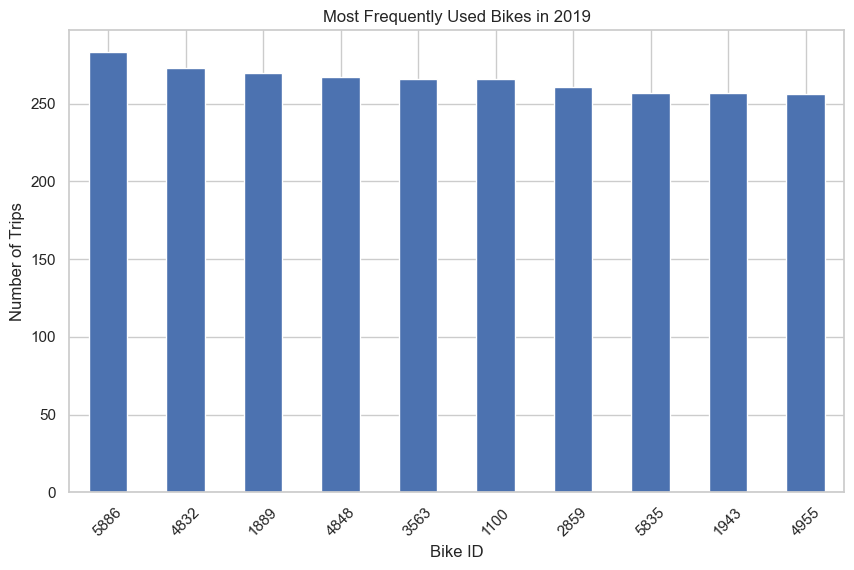

In [123]:
most_used_bikes = df['bikeid'].value_counts().head(10)

plt.figure(figsize=(10, 6))
most_used_bikes.plot(kind='bar')
plt.title('Most Frequently Used Bikes in 2019')
plt.xlabel('Bike ID')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

### Database Use:

In [124]:
# Define the path to the CSV file
csv_file_path = 'datasets/Divvy_Trips_2019_Q1.csv'

# Create a connection to the SQLite database
conn = sqlite3.connect('divvy_trips.db')

# Create the trips table if it doesn't exist
create_table_query = '''
CREATE TABLE IF NOT EXISTS trips (
    trip_id INTEGER PRIMARY KEY,
    start_time DATETIME,
    end_time DATETIME,
    bikeid INTEGER,
    tripduration INTEGER,
    from_station_id INTEGER,
    from_station_name TEXT,
    to_station_id INTEGER,
    to_station_name TEXT,
    usertype TEXT,
    gender TEXT,
    birthyear INTEGER
);
'''
conn.execute(create_table_query)
conn.commit()

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Write the DataFrame to the SQLite table named 'trips'
df.to_sql('trips', conn, if_exists='replace', index=False)

365069

In [125]:
# Query to find the most popular start stations
popular_start_stations_query = '''
SELECT from_station_name, COUNT(*) AS trip_count
FROM trips
GROUP BY from_station_name
ORDER BY trip_count DESC
LIMIT 10;
'''
popular_start_stations = pd.read_sql_query(popular_start_stations_query, conn)
print("Most Popular Start Stations:")
print(popular_start_stations)

Most Popular Start Stations:
              from_station_name  trip_count
0  Clinton St & Washington Blvd        7699
1       Clinton St & Madison St        6565
2           Canal St & Adams St        6342
3     Columbus Dr & Randolph St        4655
4         Canal St & Madison St        4571
5      Kingsbury St & Kinzie St        4395
6  Michigan Ave & Washington St        3992
7       Franklin St & Monroe St        3516
8     LaSalle St & Jackson Blvd        3252
9       Dearborn St & Monroe St        3246


In [126]:
# Query to calculate average trip duration by user type
avg_duration_query = '''
SELECT usertype, AVG(tripduration) / 60 AS avg_duration
FROM trips
GROUP BY usertype;
'''
avg_duration = pd.read_sql_query(avg_duration_query, conn)
print("\nAverage Trip Duration by User Type:")
print(avg_duration)


Average Trip Duration by User Type:
     usertype  avg_duration
0    Customer      3.433955
1  Subscriber      6.534370


In [127]:
# Query to find peak usage times by hour
peak_usage_query = '''
SELECT strftime('%H', start_time) AS hour, COUNT(*) AS trip_count
FROM trips
GROUP BY hour
ORDER BY hour;
'''
peak_usage = pd.read_sql_query(peak_usage_query, conn)
print("\nPeak Usage Times:")
print(peak_usage)


Peak Usage Times:
   hour  trip_count
0    00        1694
1    01        1008
2    02         725
3    03         562
4    04         993
5    05        3938
6    06       13015
7    07       27218
8    08       37930
9    09       17791
10   10       12437
11   11       14928
12   12       17143
13   13       17350
14   14       17320
15   15       22621
16   16       39270
17   17       49968
18   18       28777
19   19       16683
20   20        9927
21   21        6908
22   22        4353
23   23        2510


In [128]:
# Close the database connection
conn.close()

***

## End